## Question:1 Write a program that takes a string as input, and counts the frequency of each word in the string, there might be repeated characters in the string. Your task is to find the highest frequency and returns the length of the highest-frequency word.

In [82]:
def word_frequency():     
    string = eval(input("Enter a sentence: "))   
    count = 0
    word_dict = dict()
    for word in string.split():
        if word in word_dict:
            word_dict[word]+=1
        else:
            word_dict[word] = 1
    print('Word:',max(word_dict,key = lambda word_max : word_dict[word_max]))
    return len(max(word_dict,key = lambda word_max : word_dict[word_max]))
word_frequency()

Enter a sentence: 'Learn Python practice Python Learn Python Libraries Python Language is important'
Word: Python


6

In [77]:
word_frequency()

Enter a sentence: 'write write write all the number from from from 1 to 100'
Word: write


5


## Question:2 Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if he can remove just one character at the index in the string, and the remaining characters will occur the same number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO .

In [192]:
def valid_string(string):
    str_dict={}  #stores frequency of each character in string
    for i in string:
        if i in str_dict.keys():
            str_dict[i] +=1
        else:
            str_dict[i] = 1
    str_values = list(str_dict.values())
    str_count = {} #Stores count of character with specific frequency
    for i in str_values: 
        if i in str_count:
            str_count[i]+=1
        else:
            str_count[i] = 1
    if len(str_count) == 1: #It return yes,if all character have same frequency 
        return 'Yes'
    if len(str_count) > 2: #Returns No,for more than 2 unique counts as removing a single char will also not make string valid
        return 'No'
        
    count_values = list(str_count.values()) 
    count_keys = list(str_count.keys())
    #Checking if string can be made valid by removing a single character  
    if count_values[0] == 1 and (count_values[0] - count_keys[1] == 1 or count_keys[0] == 1): 
        return "YES"
    elif count_values[1] == 1 and (count_keys[1] - count_keys[0] == 1 or count_keys[1] == 1):
        return "YES"
    else:
        return "NO"
    
valid_string(string='abc')

'Yes'

In [193]:
valid_string(string='abcc')

'YES'

In [194]:
valid_string(string='abccc')

'NO'

In [195]:
valid_string('aabbcd')

'NO'

## Question:3 Write a program, which would download the data from the provided link, and then read the data and convert that into properly structured data and return it in Excel format.

In [260]:
import requests
import pandas as pd


def download_json(link,file): ## getting data from link
    response = requests.get(link)
    data = response.json()
    
    structured_data = []      ## Structing data and columns
    for item in data['pokemon']:
        multipliers = item.get('multipliers')  
        if multipliers is None: # to handle "multipliers": null
            multipliers = []
        structured_item = {
            'ID':item['id'],
            'Number': item['num'],
            'Image': item['img'],
            'Type':','.join(item['type']),
            'Height': item['height'],
            'Weight': item['weight'],
            'Candy': item.get('candy',''),
            'Candy Count': item.get('candy,_count',0),
            'Egg': item.get('egg',''),
            'Spawn Chance': item.get('spawn_chance',0),
            'Average Spawns': item.get('avg_spawns',0),
            'Spawn Time': item.get('spawn_time',''),
            'multipliers': ','.join([str(multiplier) for multiplier in item.get('multipliers', [])]), # Convert the list of multipliers to a comma-separated string
            'Weaknesses': ', '.join(pokemon.get('weaknesses', [])),
            'Next Evolution': ', '.join([evolution['name'] for evolution in item.get('next_evolution', [])]), #getting value from dict
            'Previous Evolution': ', '.join([evolution['name'] for evolution in item.get('prev_evolution', [])]) #for list of dict
        }
        structured_data.append(structured_item)
    df = pd.DataFrame(structured_data)
   
    return df

df = download_and_convert_data(link="https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json")
file = "pokemon_data.xlsx" 

data_df.to_excel(file, index=False)
print("Data saved as", file)

Data saved as pokemon_data.xlsx


In [261]:
df_pokemon=pd.read_excel('pokemon_data.xlsx')
df_pokemon.head()

,ID,Number,Name,Image,Type,Height,Weight,Candy,Candy Count,Egg,Spawn Chance,Average Spawns,Spawn Time,Weaknesses,Next Evolution,Previous Evolution,Multipliers
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25,2 km,0.690,69.0,20:00,"Fire, Ice, Flying, Psychic","Ivysaur, Venusaur",NaN,1.58
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100,Not in Eggs,0.042,4.2,07:00,"Fire, Ice, Flying, Psychic",Venusaur,Bulbasaur,"1.2, 1.6"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,0,Not in Eggs,0.017,1.7,11:30,"Fire, Ice, Flying, Psychic",NaN,"Bulbasaur, Ivysaur",NaN
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25,2 km,0.253,25.3,08:45,"Water, Ground, Rock","Charmeleon, Charizard",NaN,1.65
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100,Not in Eggs,0.012,1.2,19:00,"Water, Ground, Rock",Charizard,Charmander,1.79


## Question 4 Write a program to download the data from the link given below and then read the data and convert the into the proper structure and return it as a CSV file.

In [259]:
import requests
import csv

def download_json(link, file):
    response = requests.get(link)
    data = response.json()

    structured_data = []
    for item in data:
        geolocation = item.get('geolocation', {})
        geolocation_type = geolocation.get('type', '')
        geolocation_coordinates = geolocation.get('coordinates', '')
        structured_item = {
            'Name': item['name'],
            'Id': item['id'],
            'Name_Type': item['nametype'],
            'RecClass':item['recclass'],
            'Mass':item.get('mass',0),
            'Fall':item['fall'],
            'Year':item.get('year',0),
            'Reclat':item.get('reclat',0),
            'Reclong':item.get('reclong',0),
            'Geolocation_Type':geolocation_type,
            'Geolocation_coordinates':geolocation_coordinates
        }
        structured_data.append(structured_item)


    with open(file, 'w', newline='',encoding='utf-8') as csv_file:
        write = csv.DictWriter(csv_file, fieldnames=structured_data[0].keys())
        write.writeheader()
        write.writerows(structured_data)

link = "https://data.nasa.gov/resource/y77d-th95.json"
file = "earth.csv" 

download_json(link, file)

In [260]:
earth_df = pd.read_csv('earth.csv')
earth_df.head()

,Name,Id,Name_Type,RecClass,Mass,Fall,Year,Reclat,Reclong,Geolocation_Type,Geolocation_coordinates
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,Point,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,Point,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,Point,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,Point,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,Point,"[-64.95, -33.16667]"


## Question:5 Write a program to download the data from the given API link and then extract the following data with proper formatting

In [390]:
#Importing Libraries
import requests
import json
import pandas as pd

#creating function to get data from api link
def download_data(link):
    response = requests.get(link)
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception('Failed to get data from api link')

#Creating function to extract data from response
def extract_data(data):
    episodes = data["_embedded"]["episodes"] #
    extracted_data = []

    for episode in episodes:
        episode_data = {
            "id": episode["id"],
            "url": episode["url"],
            "name": episode["name"],
            "season": episode["season"],
            "number": episode["number"],
            "type": episode["type"],
            "airdate": episode["airdate"],
            "airtime": episode["airtime"],
            "runtime": episode["runtime"],
            "average_rating": episode["rating"]["average"],
            "summary": episode["summary"].strip("<p>").strip("</p>"),
            "medium_image_link": episode["image"]["medium"],
            "original_image_link": episode["image"]["original"],
            "Link_self": episode["_links"]['self']['href'],
            "Link_show": episode["_links"]['show']['href']
        }
        extracted_data.append(episode_data)

    return extracted_data

#API Link
link = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"

# Calling download_data function to get data from API link
episode_data = download_data(link)

try:
    if episode_data is not None:
        #Extracting data with proper formatting
        episode_data = extract_data(episode_data)

    # Creating DataFrame from extracted data
        episode_df = pd.DataFrame(episode_data)

    # Save DataFrame to CSV
    episode_df.to_csv("episode_data.csv", index=False)
    print("Data saved to episode_data.csv")

except Exception as e:
    print("Failed to download data from the API.")

Data saved to episode_data.csv


In [391]:
episode_df=pd.read_csv('episode_data.csv')
episode_df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link,Link_self,Link_show
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/869671,https://api.tvmaze.com/shows/1371
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/911201,https://api.tvmaze.com/shows/1371
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/911204,https://api.tvmaze.com/shows/1371
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/911205,https://api.tvmaze.com/shows/1371
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/927174,https://api.tvmaze.com/shows/1371


## Question 6 - Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding

Insights to be drawn -
Get all Pokemons whose spawn rate is less than 5%
1. Get all Pokemons that have less than 4 weaknesses
2. Get all Pokemons that have no multipliers at all
3. Get all Pokemons that do not have more than 2 evolutions
4. Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
5. Get all Pokemon who have more than two types of capabilities

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

df = pd.read_excel("pokemon_data.xlsx")
df.head()

,ID,Number,Name,Image,Type,Height,Weight,Candy,Candy Count,Egg,Spawn Chance,Average Spawns,Spawn Time,Weaknesses,Next Evolution,Previous Evolution,Multipliers
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"Grass, Poison",0.71 m,6.9 kg,Bulbasaur Candy,25,2 km,0.690,69.0,20:00,"Fire, Ice, Flying, Psychic","Ivysaur, Venusaur",NaN,1.58
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"Grass, Poison",0.99 m,13.0 kg,Bulbasaur Candy,100,Not in Eggs,0.042,4.2,07:00,"Fire, Ice, Flying, Psychic",Venusaur,Bulbasaur,"1.2, 1.6"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"Grass, Poison",2.01 m,100.0 kg,Bulbasaur Candy,0,Not in Eggs,0.017,1.7,11:30,"Fire, Ice, Flying, Psychic",NaN,"Bulbasaur, Ivysaur",NaN
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61 m,8.5 kg,Charmander Candy,25,2 km,0.253,25.3,08:45,"Water, Ground, Rock","Charmeleon, Charizard",NaN,1.65
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09 m,19.0 kg,Charmander Candy,100,Not in Eggs,0.012,1.2,19:00,"Water, Ground, Rock",Charizard,Charmander,1.79


In [3]:
pokemon.shape

(151, 17)

In [57]:
df=df.drop(labels=['ID','Number','Image'],axis=1)

## Get all Pokemons whose spawn rate is less than 5%

In [58]:
less_spawn_rate=df[df['Spawn Chance']<5]
print("Spawn Rate Less Than 5%")
less_spawn_rate[['Name',"Spawn Chance"]]

Spawn Rate Less Than 5%


,Name,Spawn Chance
0,Bulbasaur,0.6900
1,Ivysaur,0.0420
2,Venusaur,0.0170
3,Charmander,0.2530
4,Charmeleon,0.0120
...,...,...
146,Dratini,0.3000
147,Dragonair,0.0200
148,Dragonite,0.0011
149,Mewtwo,0.0000


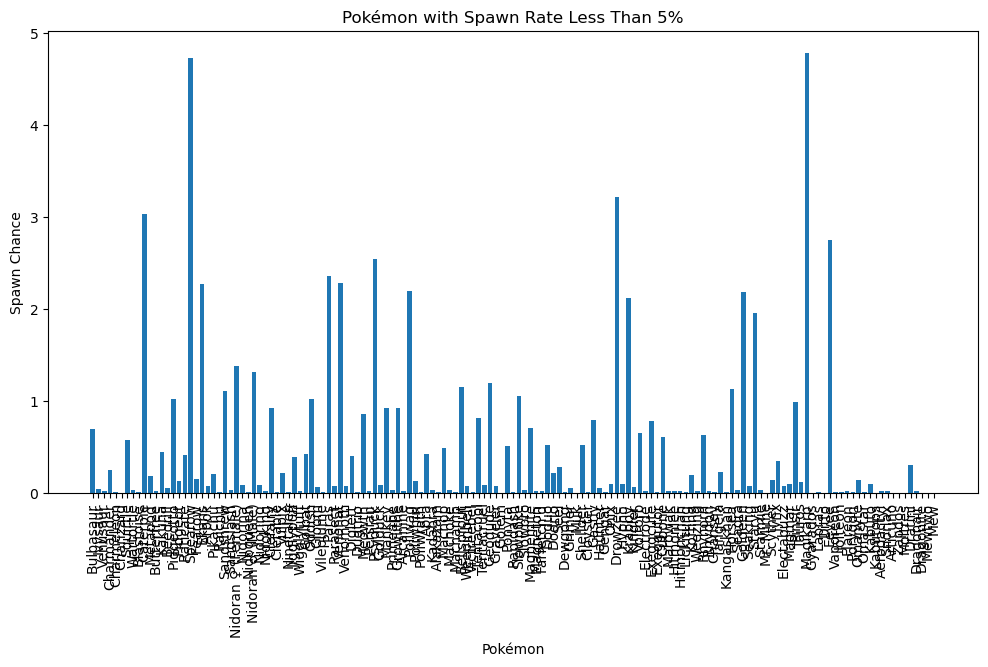

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(less_spawn_rate["Name"], less_spawn_rate["Spawn Chance"])
plt.xlabel("Pokémon")
plt.ylabel("Spawn Chance")
plt.title("Pokémon with Spawn Rate Less Than 5%")
plt.xticks(rotation=90)
plt.show()


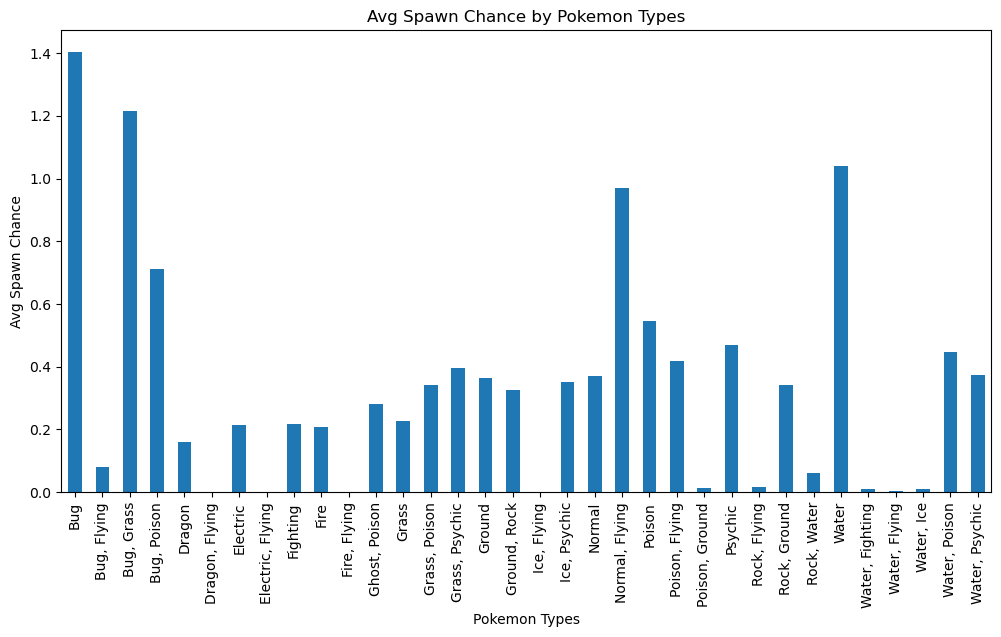

In [61]:
grouped_df = less_spawn_rate.groupby('Type')['Spawn Chance'].mean()
grouped_df.plot(kind="bar",figsize=(12,6))
plt.xlabel('Pokemon Types')
plt.ylabel('Avg Spawn Chance')
plt.title("Avg Spawn Chance by Pokemon Types")
plt.xticks(rotation = 90)
plt.show()

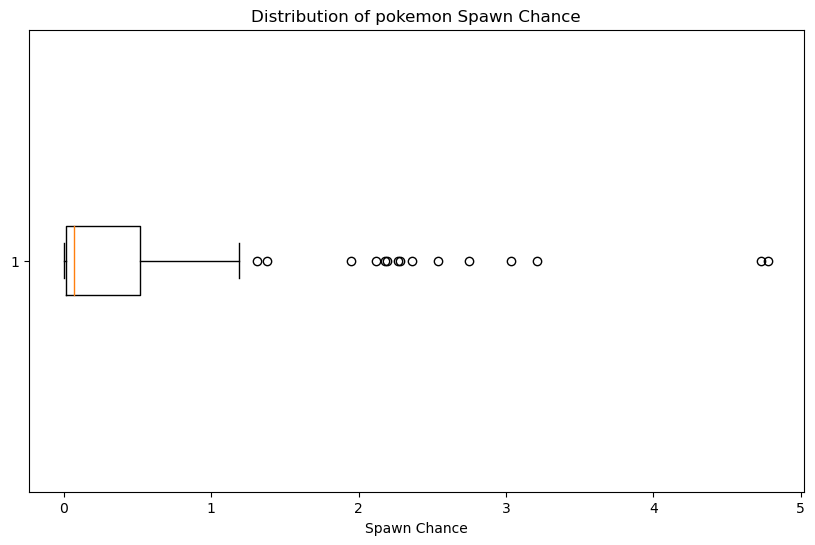

In [65]:
plt.figure(figsize=(10,6))
plt.boxplot(less_spawn_rate['Spawn Chance'],vert=False)
plt.xlabel('Spawn Chance')
plt.title('Distribution of pokemon Spawn Chance')
plt.show()

## Get all Pokemons that have less than 4 weaknesses

In [66]:
df['Weaknesses']=df['Weaknesses'].str.split(",").apply(lambda x : len(x))
weakness=df[df['Weaknesses']<4]
print("Pokemons that have less than 4 weaknesses")
weakness[['Name','Weaknesses']]

Pokemons that have less than 4 weaknesses


,Name,Weaknesses
3,Charmander,3
4,Charmeleon,3
5,Charizard,3
6,Squirtle,2
7,Wartortle,2
...,...,...
145,Moltres,3
146,Dratini,3
147,Dragonair,3
149,Mewtwo,3


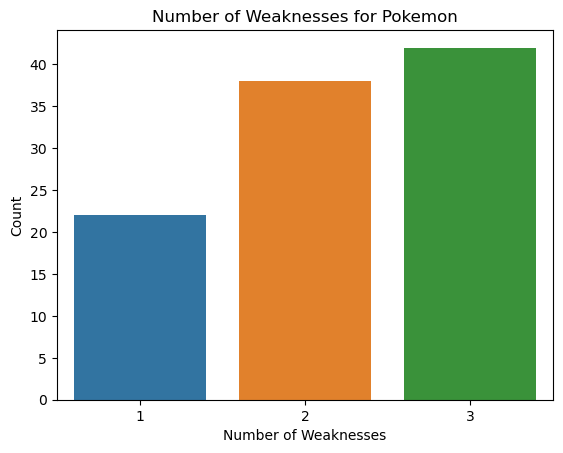

In [67]:
sns.countplot(data=weakness, x='Weaknesses')
plt.xlabel('Number of Weaknesses')
plt.ylabel('Count')
plt.title('Number of Weaknesses for Pokemon')
plt.show()

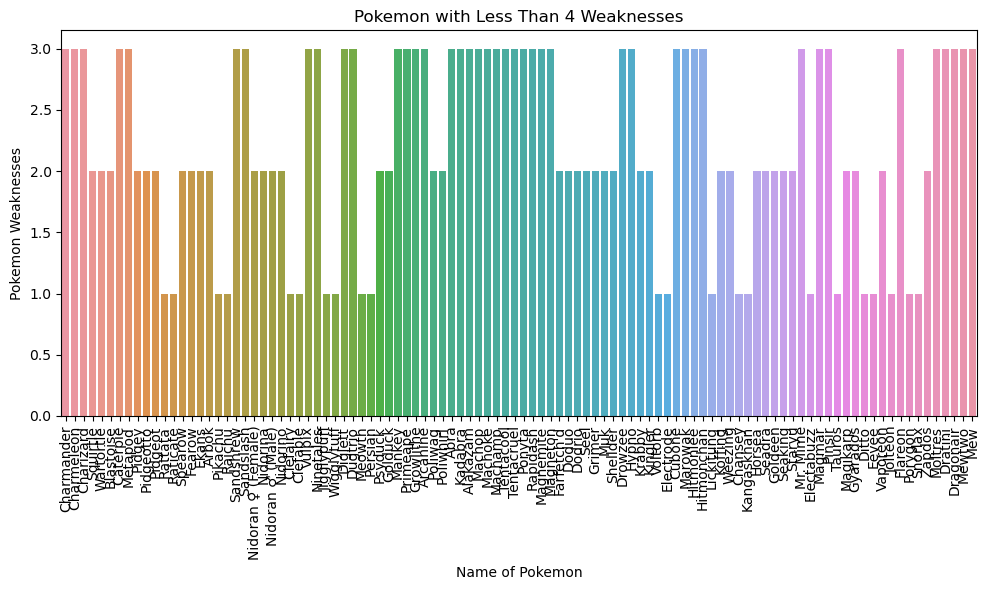

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(data=weakness,x='Name', y="Weaknesses")
plt.xlabel("Name of Pokemon")
plt.ylabel("Pokemon Weaknesses")
plt.title("Pokemon with Less Than 4 Weaknesses")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

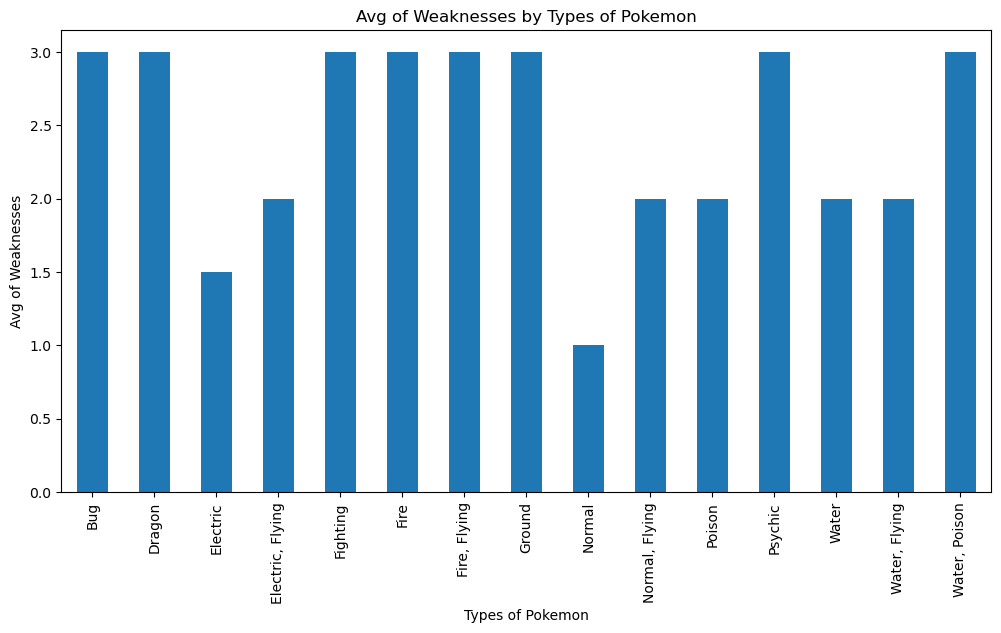

In [69]:
grouped_type=weakness.groupby('Type')['Weaknesses'].mean()
grouped_type.plot(kind='bar',figsize=(12,6))
plt.xlabel('Types of Pokemon')
plt.ylabel('Avg of Weaknesses')
plt.title('Avg of Weaknesses by Types of Pokemon')
plt.xticks(rotation = 90)
plt.show()

## Get all Pokemons that have no multipliers at all 

In [127]:
df['Multipliers'].unique()

array(['1.58', '1.2, 1.6', nan, '1.65', '1.79', '2.1', '1.4', '1.05',
       '3.55, 3.79', '1.01, 1.09', '3.01, 3.41', '1.71, 1.92',
       '2.55, 2.73', '2.66, 2.68', '2.21, 2.27', '2.34', '2.45',
       '1.63, 2.48', '1.83, 2.48', '1.64, 1.7', '1.83', '2.03, 2.14',
       '2.74, 2.81', '1.85', '2.6, 3.67', '1.5', '1.49', '2.02',
       '1.86, 1.9', '2.69', '1.98', '2.27', '2.17, 2.28', '2.31, 2.36',
       '1.72, 1.73', '1.95', '1.36, 1.95', '1.64, 1.65', '1.7', '1.57',
       '1.59', '2.52', '1.75, 1.76', '1.64, 1.72', '1.48, 1.5', '2.21',
       '2.16, 2.17', '2.19, 2.24', '1.04, 1.96', '2.44', '2.65', '1.78',
       '1.56, 1.8', '2.08, 2.09', '2.36, 2.4', '2.01, 2.02', '2.7, 3.18',
       '1.67', '1.11', '1.91', '2.23', '2.15, 2.2', '2.38, 2.41',
       '10.1, 11.8', '2.02, 2.64', '2.12', '1.97, 2.37', '1.83, 1.84',
       '2.05'], dtype=object)

In [128]:
no_multipliers_pokemon=df[df['Multipliers'].isna()]
print("Pokemon that have no multipliers")
no_multipliers_pokemon[['Name','Multipliers']]

Pokemon that have no multipliers


,Name,Multipliers
2,Venusaur,NaN
5,Charizard,NaN
8,Blastoise,NaN
11,Butterfree,NaN
14,Beedrill,NaN
...,...,...
144,Zapdos,NaN
145,Moltres,NaN
148,Dragonite,NaN
149,Mewtwo,NaN


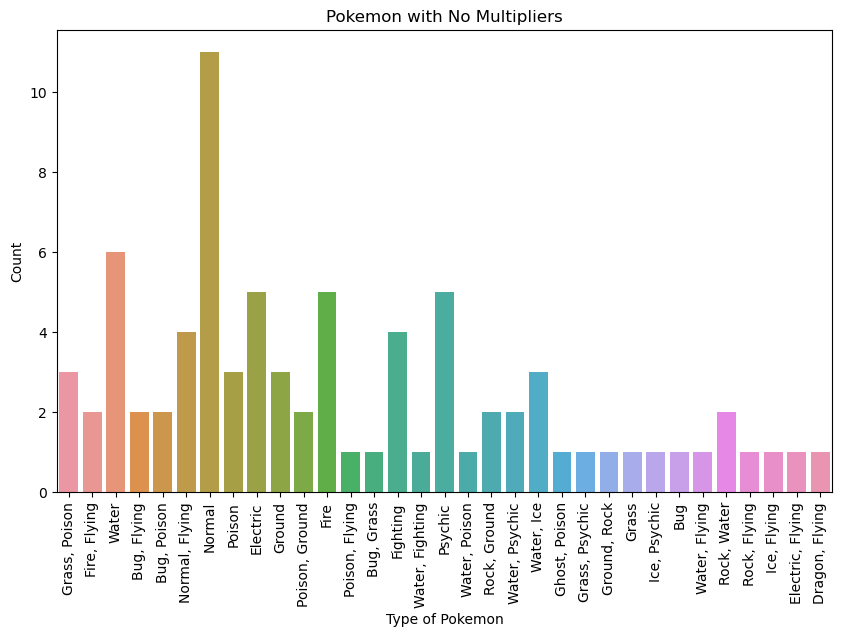

In [129]:
plt.figure(figsize=(10, 6))
sns.countplot(data=no_multipliers_pokemon, x='Type')
plt.xlabel('Type of Pokemon')
plt.ylabel('Count')
plt.title('Pokemon with No Multipliers')
plt.xticks(rotation=90)
plt.show()

## Get all Pokemons that do not have more than 2 evolutions

In [75]:
df['Next Evolution'].unique()

array(['Ivysaur, Venusaur', 'Venusaur', nan, 'Charmeleon, Charizard',
       'Charizard', 'Wartortle, Blastoise', 'Blastoise',
       'Metapod, Butterfree', 'Butterfree', 'Kakuna, Beedrill',
       'Beedrill', 'Pidgeotto, Pidgeot', 'Pidgeot', 'Raticate', 'Fearow',
       'Arbok', 'Raichu', 'Sandslash', 'Nidorina, Nidoqueen', 'Nidoqueen',
       'Nidorino, Nidoking', 'Nidoking', 'Clefable', 'Ninetales',
       'Wigglytuff', 'Golbat', 'Gloom, Vileplume', 'Vileplume',
       'Parasect', 'Venomoth', 'Dugtrio', 'Persian', 'Golduck',
       'Primeape', 'Arcanine', 'Poliwhirl, Poliwrath', 'Poliwrath',
       'Kadabra, Alakazam', 'Alakazam', 'Machoke, Machamp', 'Machamp',
       'Weepinbell, Victreebel', 'Victreebel', 'Tentacruel',
       'Graveler, Golem', 'Golem', 'Rapidash', 'Slowbro', 'Magneton',
       'Dodrio', 'Dewgong', 'Muk', 'Cloyster', 'Haunter, Gengar',
       'Gengar', 'Hypno', 'Kingler', 'Electrode', 'Exeggutor', 'Marowak',
       'Weezing', 'Rhydon', 'Seadra', 'Seaking', 'Starmi

In [91]:
#Only One pokemon has more than two evolution
df[df['Next Evolution'].apply(lambda x: isinstance(x, list) and len(x) > 2 or isinstance(x, str) and x.count(',') + 1 > 2 )].

,Name,Type,Height,Weight,Candy,Candy Count,Egg,Spawn Chance,Average Spawns,Spawn Time,Weaknesses,Next Evolution,Previous Evolution,Multipliers
132,Eevee,Normal,0.30 m,6.5 kg,Eevee Candy,25,10 km,2.75,275.0,05:32,1,"Vaporeon, Jolteon, Flareon",NaN,"2.02, 2.64"


In [110]:
#Pokemon Evolution that have two evolution
df[df['Next Evolution'].apply(lambda x: isinstance(x, list) and len(x) == 2 or isinstance(x, str) and x.count(',') + 1 == 2 )].shape

(16, 14)

In [108]:
#Considering NaN values as pokemon has no evolution.
df[df['Next Evolution'].apply(lambda x: pd.isnull(x))].shape

(81, 14)

In [131]:
#Retrieving only those pokemon that have either 0,1 0r excatly 2 evolution and only one datapoint has three evolution
less_evolution=df[df['Next Evolution'].apply(lambda x: isinstance(x, list) and len(x) <= 2 or isinstance(x, str) and x.count(',') + 1 <= 2 or pd.isnull(x))]
print("Pokemon with less than 2 evolution")
less_evolution[['Name','Next Evolution']]

Pokemon with less than 2 evolution


,Name,Next Evolution
0,Bulbasaur,"Ivysaur, Venusaur"
1,Ivysaur,Venusaur
2,Venusaur,NaN
3,Charmander,"Charmeleon, Charizard"
4,Charmeleon,Charizard
...,...,...
146,Dratini,"Dragonair, Dragonite"
147,Dragonair,Dragonite
148,Dragonite,NaN
149,Mewtwo,NaN


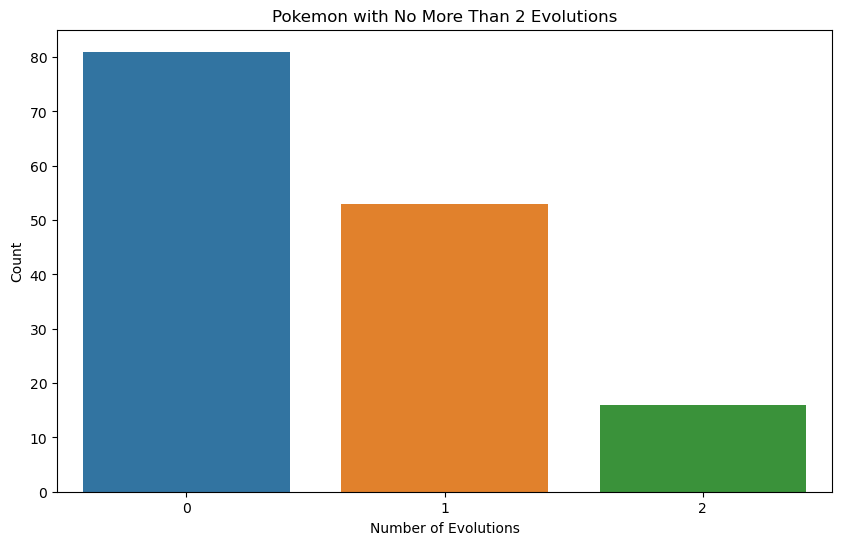

In [123]:
plt.figure(figsize=(10,6))
evol_count=less_evolution['Next Evolution'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0).value_counts()
sns.barplot(x=evol_count.index,y= evol_count.values)
plt.xlabel('Number of Evolutions')
plt.ylabel('Count')
plt.title('Pokemon with No More Than 2 Evolutions')
plt.show()

## Get all Pokemons whose spawn time is less than 300 seconds.

In [133]:
df['Spawn Time'].unique()

array(['20:00', '07:00', '11:30', '08:45', '19:00', '13:34', '04:25',
       '07:02', '00:06', '16:35', '02:11', '05:23', '02:21', '02:30',
       '04:50', '01:34', '01:30', '01:50', '01:55', '01:56', '12:25',
       '01:11', '12:20', '04:00', '23:58', '01:58', '12:34', '01:51',
       '07:22', '12:35', '01:12', '09:02', '12:16', '03:30', '03:29',
       '13:43', '01:32', '08:46', '12:28', '02:15', '03:58', '11:33',
       '01:42', '01:22', '02:31', '23:40', '02:22', '12:37', '02:54',
       '02:44', '03:41', '23:06', '12:52', '12:33', '03:57', '03:11',
       '03:40', '09:14', '04:30', '11:25', '10:32', '02:55', '04:10',
       '09:45', '12:19', '03:20', '23:36', '12:40', '04:53', '02:50',
       '07:12', '02:56', '04:04', '15:25', '01:09', '05:10', '02:12',
       '06:46', '06:04', '15:11', '01:28', '07:39', '02:33', '04:21',
       '00:10', '03:55', '01:18', '02:17', '03:33', '03:44', '04:36',
       '09:09', '03:59', '05:58', '02:46', '08:16', '12:17', '03:21',
       '05:50', '04:

In [139]:
df['Spawn Time'].isnull().sum()

6

In [141]:
df['Spawn Time'].fillna(method="ffill",inplace=True)

In [150]:
df['Spawn_time_sec']=df['Spawn Time'].apply(lambda x: (int(x.split(":")[0]))*60 + int(x.split(':')[1]))

In [153]:
less_spawn_time=df[df['Spawn_time_sec']<300]
print('Pokemons with less than 300 spawn time')
less_spawn_time[['Name','Spawn_time_sec']]

Pokemons with less than 300 spawn time


,Name,Spawn_time_sec
6,Squirtle,265
8,Blastoise,6
10,Metapod,131
12,Weedle,141
13,Kakuna,150
...,...,...
127,Tauros,37
129,Gyarados,135
134,Jolteon,150
136,Porygon,169


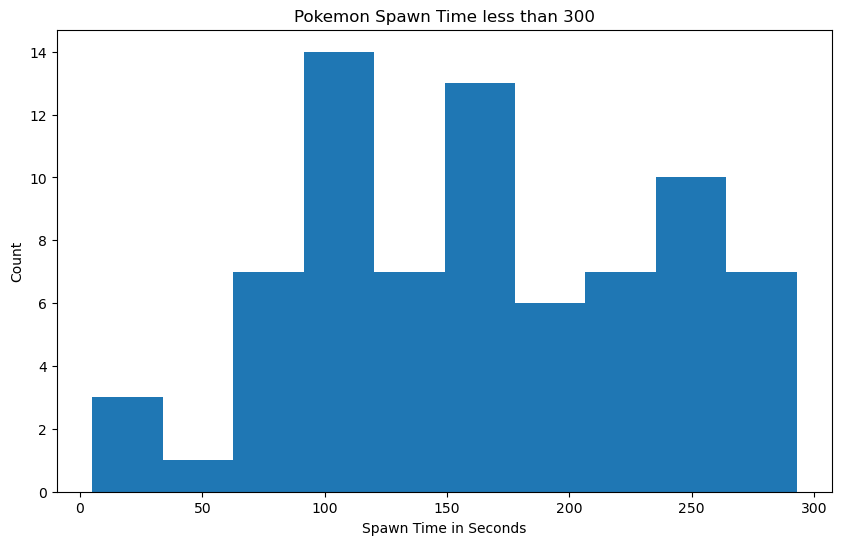

In [674]:
plt.figure(figsize=(10,6))
plt.hist(less_spawn_time['Spawn_time_sec'],bins=10)
plt.xlabel('Spawn Time in Seconds')
plt.ylabel("Count")
plt.title("Pokemon Spawn Time less than 300")
plt.show()

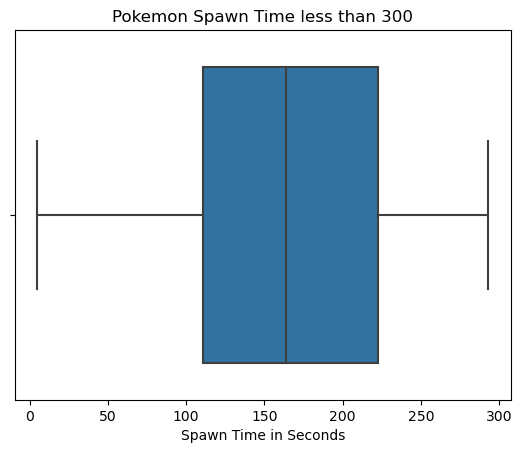

In [160]:
sns.boxplot(x=less_spawn_time['Spawn_time_sec'])
plt.xlabel('Spawn Time in Seconds')
plt.title("Pokemon Spawn Time less than 300")
plt.show()

## Get all Pokemon who have more than two types of capabilities

In [161]:
df.columns

Index(['Name', 'Type', 'Height', 'Weight', 'Candy', 'Candy Count', 'Egg',
       'Spawn Chance', 'Average Spawns', 'Spawn Time', 'Weaknesses',
       'Next Evolution', 'Previous Evolution', 'Multipliers',
       'Spawn_time_sec'],
      dtype='object')

In [163]:
df['Type'].unique()

array(['Grass, Poison', 'Fire', 'Fire, Flying', 'Water', 'Bug',
       'Bug, Flying', 'Bug, Poison', 'Normal, Flying', 'Normal', 'Poison',
       'Electric', 'Ground', 'Poison, Ground', 'Poison, Flying',
       'Bug, Grass', 'Fighting', 'Water, Fighting', 'Psychic',
       'Water, Poison', 'Rock, Ground', 'Water, Psychic', 'Water, Ice',
       'Ghost, Poison', 'Grass, Psychic', 'Ground, Rock', 'Grass',
       'Ice, Psychic', 'Water, Flying', 'Rock, Water', 'Rock, Flying',
       'Ice, Flying', 'Electric, Flying', 'Dragon', 'Dragon, Flying'],
      dtype=object)

In [164]:
df['Type'].value_counts()

Water               18
Normal              16
Fire                10
Poison              10
Grass, Poison        9
Normal, Flying       8
Electric             8
Psychic              8
Fighting             7
Ground               6
Bug, Poison          5
Rock, Water          4
Rock, Ground         4
Ghost, Poison        3
Water, Psychic       3
Water, Ice           3
Bug                  3
Water, Poison        2
Bug, Grass           2
Poison, Flying       2
Bug, Flying          2
Poison, Ground       2
Grass, Psychic       2
Ground, Rock         2
Fire, Flying         2
Dragon               2
Water, Fighting      1
Ice, Flying          1
Electric, Flying     1
Grass                1
Rock, Flying         1
Water, Flying        1
Ice, Psychic         1
Dragon, Flying       1
Name: Type, dtype: int64

In [178]:
capabilites=df[df['Type'].str.split(",").apply(lambda x:len(x)>2)]
print("Pokemon with more than two capabilites")
print(capabilites)

Pokemon with more than two capabilites
Empty DataFrame
Columns: [Name, Type, Height, Weight, Candy, Candy Count, Egg, Spawn Chance, Average Spawns, Spawn Time, Weaknesses, Next Evolution, Previous Evolution, Multipliers, Spawn_time_sec]
Index: []


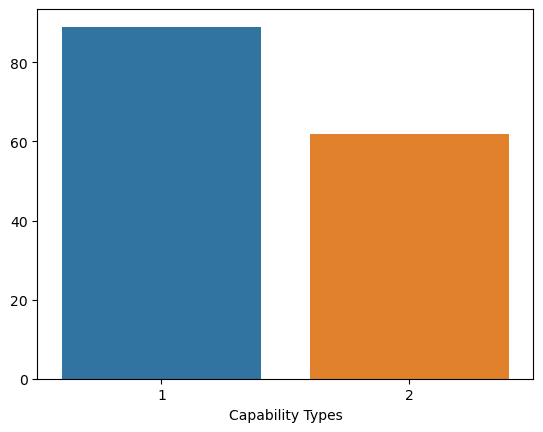

In [201]:
type_counts = df['Type'].str.split(',').apply(lambda x: len(x)).value_counts()
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.xlabel('Capability Types')
plt.show()

#### There is no pokemon which has more than two capabilites.

In [184]:
## retrieving Pokemon who have more than equal to two types of capabilities
capabilites_equal_to_two=df[df['Type'].str.split(",").apply(lambda x:len(x)>=2)]
print('Pokemon with capability greater than equal to two')
capabilites_equal_to_two[['Name','Type']]

Pokemon with capability greater than equal to two


,Name,Type
0,Bulbasaur,"Grass, Poison"
1,Ivysaur,"Grass, Poison"
2,Venusaur,"Grass, Poison"
5,Charizard,"Fire, Flying"
11,Butterfree,"Bug, Flying"
...,...,...
141,Aerodactyl,"Rock, Flying"
143,Articuno,"Ice, Flying"
144,Zapdos,"Electric, Flying"
145,Moltres,"Fire, Flying"


## Question 7 - Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [261]:
earth=pd.read_csv("earth.csv")
earth.head()

,Name,Id,Name_Type,RecClass,Mass,Fall,Year,Reclat,Reclong,Geolocation_Type,Geolocation_coordinates
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.77500,6.08333,Point,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01T00:00:00.000,56.18333,10.23333,Point,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01T00:00:00.000,54.21667,-113.00000,Point,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01T00:00:00.000,16.88333,-99.90000,Point,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01T00:00:00.000,-33.16667,-64.95000,Point,"[-64.95, -33.16667]"


In [262]:
earth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     1000 non-null   object 
 1   Id                       1000 non-null   int64  
 2   Name_Type                1000 non-null   object 
 3   RecClass                 1000 non-null   object 
 4   Mass                     1000 non-null   float64
 5   Fall                     1000 non-null   object 
 6   Year                     1000 non-null   object 
 7   Reclat                   1000 non-null   float64
 8   Reclong                  1000 non-null   float64
 9   Geolocation_Type         988 non-null    object 
 10  Geolocation_coordinates  988 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 86.1+ KB


In [263]:
earth.shape

(1000, 11)

In [264]:
earth.columns

Index(['Name', 'Id', 'Name_Type', 'RecClass', 'Mass', 'Fall', 'Year', 'Reclat',
       'Reclong', 'Geolocation_Type', 'Geolocation_coordinates'],
      dtype='object')

## Get all the Earth meteorites that fell before the year 2000

In [250]:
earth['Name']

0         Aachen
1         Aarhus
2           Abee
3       Acapulco
4        Achiras
         ...    
995     Tirupati
996      Tissint
997        Tjabe
998     Tjerebon
999    Tomakovka
Name: Name, Length: 1000, dtype: object

In [251]:
earth['Fall'].unique()

array(['Fell', 'Found'], dtype=object)

In [267]:
earth['Year']=pd.to_datetime(earth['Year'],errors='coerce')

In [277]:
meteorites_before_2000=earth[(earth['Year'].dt.year < 2000) & (earth['Fall'] == 'Fell')]
print("Meteorites Fell Before 2000")
meteorites_before_2000[['Name','Year']]

Meteorites Fell Before 2000


,Name,Year
0,Aachen,1880-01-01
1,Aarhus,1951-01-01
2,Abee,1952-01-01
3,Acapulco,1976-01-01
4,Achiras,1902-01-01
...,...,...
994,Timochin,1807-01-01
995,Tirupati,1934-01-01
997,Tjabe,1869-01-01
998,Tjerebon,1922-01-01


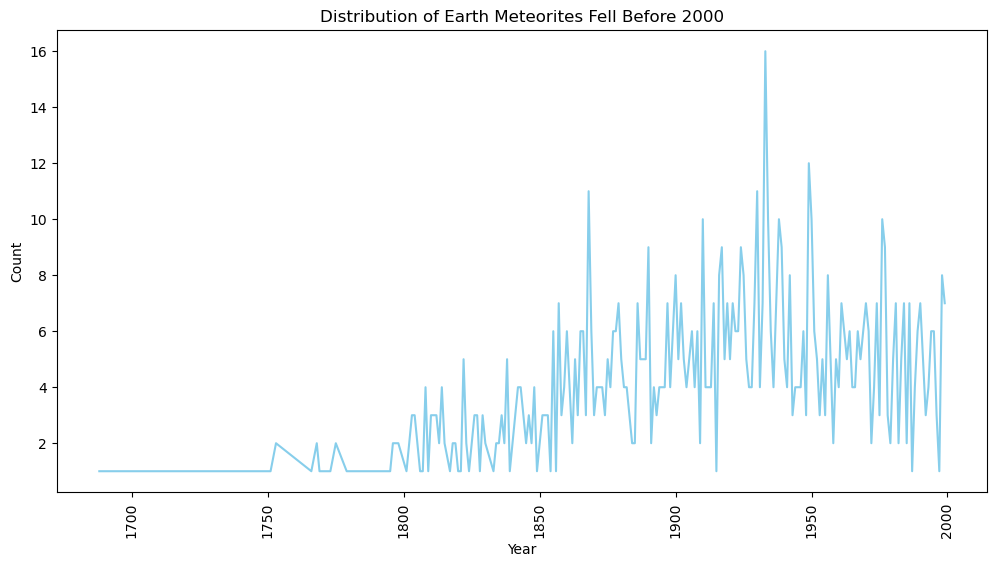

In [286]:
meteorite_counts = meteorites_before_2000['Year'].dt.year.value_counts().sort_index()
plt.figure(figsize=(12, 6))
meteorite_counts.plot(kind='line', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Earth Meteorites Fell Before 2000')
plt.xticks(rotation=90)
plt.show()

## Get all the earth meteorites co-ordinates who fell before the year 1970 

In [287]:
earth.Geolocation_coordinates

0          [6.08333, 50.775]
1       [10.23333, 56.18333]
2           [-113, 54.21667]
3          [-99.9, 16.88333]
4        [-64.95, -33.16667]
               ...          
995     [79.41667, 13.63333]
996     [-7.61123, 29.48195]
997    [111.53333, -7.08333]
998    [106.58333, -6.66667]
999        [34.76667, 47.85]
Name: Geolocation_coordinates, Length: 1000, dtype: object

In [289]:
earth[['Reclong','Reclat','Geolocation_coordinates']]

,Reclong,Reclat,Geolocation_coordinates
0,6.08333,50.77500,"[6.08333, 50.775]"
1,10.23333,56.18333,"[10.23333, 56.18333]"
2,-113.00000,54.21667,"[-113, 54.21667]"
3,-99.90000,16.88333,"[-99.9, 16.88333]"
4,-64.95000,-33.16667,"[-64.95, -33.16667]"
...,...,...,...
995,79.41667,13.63333,"[79.41667, 13.63333]"
996,-7.61123,29.48195,"[-7.61123, 29.48195]"
997,111.53333,-7.08333,"[111.53333, -7.08333]"
998,106.58333,-6.66667,"[106.58333, -6.66667]"


In [290]:
earth[earth.Geolocation_coordinates.isna()]

,Name,Id,Name_Type,RecClass,Mass,Fall,Year,Reclat,Reclong,Geolocation_Type,Geolocation_coordinates
147,Bulls Run,5163,Valid,Iron?,2250.0,Fell,1964-01-01,0.0,0.0,NaN,NaN
208,Clohars,5383,Valid,L4,48.6,Fell,1822-01-01,0.0,0.0,NaN,NaN
409,Jalanash,12068,Valid,Ureilite,700.0,Fell,1990-01-01,0.0,0.0,NaN,NaN
414,Jemlapur,12079,Valid,L6,450.0,Fell,1901-01-01,0.0,0.0,NaN,NaN
520,Cumulus Hills 04075,32531,Valid,Pallasite,9.6,Found,2003-01-01,0.0,0.0,NaN,NaN
586,Maria Linden,15418,Valid,L4,114.0,Fell,1925-01-01,0.0,0.0,NaN,NaN
681,Natal,16923,Valid,Stone-uncl,1.4,Fell,1973-01-01,0.0,0.0,NaN,NaN
694,Niger (L6),16974,Valid,L6,3.3,Fell,1967-01-01,0.0,0.0,NaN,NaN
695,Niger (LL6),16975,Valid,LL6,3.3,Fell,1967-01-01,0.0,0.0,NaN,NaN
757,Dominion Range 03239,32591,Valid,L6,69.5,Found,2002-01-01,0.0,0.0,NaN,NaN


#### Reclat (Latitude) and Reclong (Longitude) values is zero.So, will drop NaN values of  geolocation_coordinates.

In [293]:
earth.dropna(inplace=True)

In [294]:
earth.isnull().sum()

Name                       0
Id                         0
Name_Type                  0
RecClass                   0
Mass                       0
Fall                       0
Year                       0
Reclat                     0
Reclong                    0
Geolocation_Type           0
Geolocation_coordinates    0
dtype: int64

In [306]:
meteorites_before_1970=earth[(earth['Year'].dt.year < 1970) & (earth['Fall'] == 'Fell')]
print("Meteorites Fell Before 1970")
meteorites_before_1970[['Name','Year','Geolocation_coordinates']]

Meteorites Fell Before 1970


,Name,Year,Geolocation_coordinates
0,Aachen,1880-01-01,"[6.08333, 50.775]"
1,Aarhus,1951-01-01,"[10.23333, 56.18333]"
2,Abee,1952-01-01,"[-113, 54.21667]"
4,Achiras,1902-01-01,"[-64.95, -33.16667]"
5,Adhi Kot,1919-01-01,"[71.8, 32.1]"
...,...,...,...
994,Timochin,1807-01-01,"[35.2, 54.5]"
995,Tirupati,1934-01-01,"[79.41667, 13.63333]"
997,Tjabe,1869-01-01,"[111.53333, -7.08333]"
998,Tjerebon,1922-01-01,"[106.58333, -6.66667]"


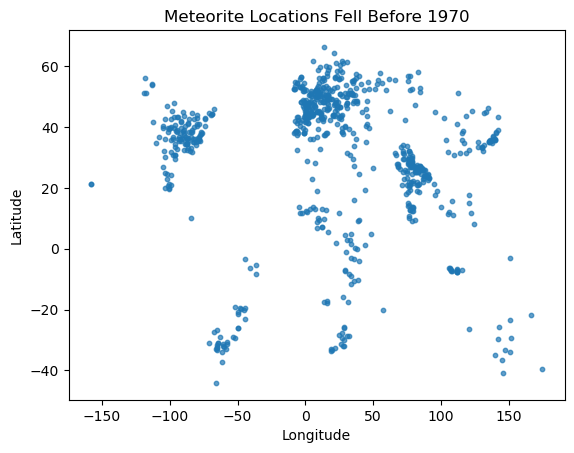

In [309]:
plt.scatter(meteorites_before_1970['Reclong'],meteorites_before_1970['Reclat'],s=10, alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Meteorite Locations Fell Before 1970')
plt.show()


## Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

In [315]:
earth_mass_above_10000kg=earth[earth['Mass']>10000]
print('Earth Mass More Than 10000kg')
earth_mass_above_10000kg[['Name','Mass']]

Earth Mass More Than 10000kg


,Name,Mass
2,Abee,107000.0
7,Agen,30000.0
11,Aïr,24000.0
16,Akyumak,50000.0
27,Alfianello,228000.0
...,...,...
991,Tieschitz,28000.0
992,Tilden,74800.0
994,Timochin,65500.0
997,Tjabe,20000.0


In [372]:
earth_mass_above_10000kg.nlargest(30,'Mass').head()

,Name,Id,Name_Type,RecClass,Mass,Fall,Year,Reclat,Reclong,Geolocation_Type,Geolocation_coordinates
920,Sikhote-Alin,23593,Valid,"Iron, IIAB",23000000.0,Fell,1947-01-01,46.16000,134.65333,Point,"[134.65333, 46.16]"
419,Jilin,12171,Valid,H5,4000000.0,Fell,1976-01-01,44.05000,126.16667,Point,"[126.16667, 44.05]"
29,Allende,2278,Valid,CV3,2000000.0,Fell,1969-01-01,26.96667,-105.31667,Point,"[-105.31667, 26.96667]"
506,Kunya-Urgench,12379,Valid,H5,1100000.0,Fell,1998-01-01,42.25000,59.20000,Point,"[59.2, 42.25]"
707,Norton County,17922,Valid,Aubrite,1100000.0,Fell,1948-01-01,39.68333,-99.86667,Point,"[-99.86667, 39.68333]"


In [675]:
import plotly.express as px
earth_mass_top30=earth_mass_above_10000kg.nlargest(30,'Mass')
px.sunburst(earth_mass_top30,path=['Mass','Name'])

## Question 8 - Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season

In [392]:
episode_df = pd.read_csv('episode_data.csv')
episode_df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average_rating,summary,medium_image_link,original_image_link,Link_self,Link_show
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/869671,https://api.tvmaze.com/shows/1371
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/911201,https://api.tvmaze.com/shows/1371
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/911204,https://api.tvmaze.com/shows/1371
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/911205,https://api.tvmaze.com/shows/1371
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...,https://api.tvmaze.com/episodes/927174,https://api.tvmaze.com/shows/1371


In [379]:
episode_df.shape

(36, 13)

In [393]:
episode_df.columns

Index(['id', 'url', 'name', 'season', 'number', 'type', 'airdate', 'airtime',
       'runtime', 'average_rating', 'summary', 'medium_image_link',
       'original_image_link', 'Link_self', 'Link_show'],
      dtype='object')

## Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on

In [394]:
episode_df.season.value_counts()

1    10
2    10
3     8
4     8
Name: season, dtype: int64

In [403]:
overall_season_rating=episode_df.groupby('season')['average_rating'].mean().reset_index()

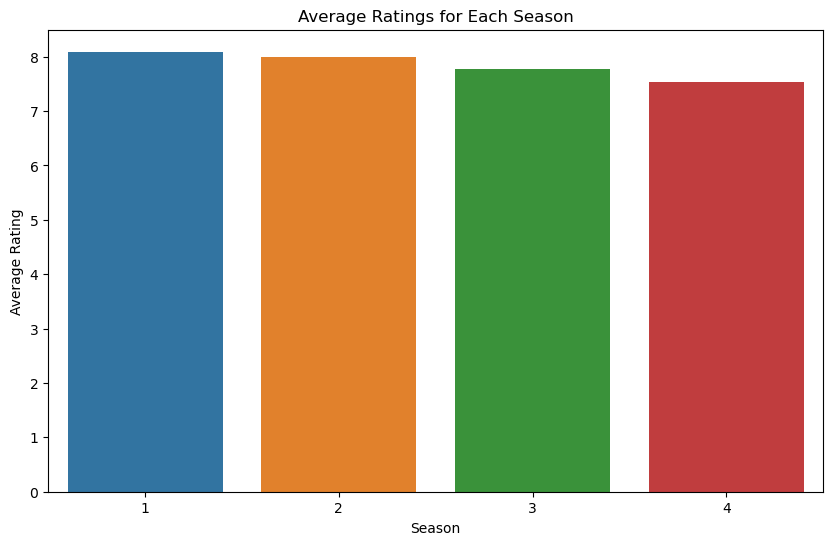

In [405]:
plt.figure(figsize=(10, 6))
sns.barplot(data=overall_season_rating, x="season", y="average_rating")
plt.xlabel("Season")
plt.ylabel("Average Rating")
plt.title("Average Ratings for Each Season")
plt.show()

## Get all the episode names, whose average rating is more than 8 for every season

In [417]:
episodes_high_rating=episode_df[episode_df.average_rating>8]
episodes_high_rating[['name','season']]

,name,season
6,Trompe L'Oeil,1
8,The Well-Tempered Clavier,1
9,The Bicameral Mind,1
17,Kiksuya,2
18,Vanishing Point,2
19,The Passenger,2


## Get all the episode names that aired before May 2019 

In [428]:
episode_df['airdate']=pd.to_datetime(episode_df['airdate'],errors='coerce')

In [443]:
episode_before_2019=episode_df[(episode_df['airdate'].dt.year<2019) & (episode_df['airdate'].dt.month<5)]
print('Episode Names That Aired Before May 2019')
episode_before_2019[['airdate','name']]

Episode Names That Aired Before May 2019


,airdate,name
10,2018-04-22,Journey Into Night
11,2018-04-29,Reunion


## Get the episode name from each season with the highest and lowest rating 

In [536]:
season_ratings=episode_df.groupby('season')['average_rating'].agg(['idxmin','idxmax'])
lowest_rating=episode_df.loc[season_ratings['idxmin'], ['season','name']]
highest_rating=episode_df.loc[season_ratings['idxmax'], ['season','name']]

In [537]:
print('Highest rating episodes of each season')
highest_rating

Highest rating episodes of each season


,season,name
9,1,The Bicameral Mind
17,2,Kiksuya
20,3,Parce Domine
32,4,Zhuangzi


In [538]:
print("lowest rating episodes for each season")
lowest_rating

lowest rating episodes for each season


,season,name
2,1,The Stray
14,2,Akane No Mai
25,3,Decoherence
28,4,The Auguries


## Get the summary for the most popular ( ratings ) episode in every season

In [539]:
popular_episode=episode_df.groupby('season')['average_rating'].idxmax()
popular_episode_summary=episode_df.loc[popular_episode,['season','name','summary']]
popular_episode_summary

,season,name,summary
9,1,The Bicameral Mind,Delores finds out the truth about William's fa...
17,2,Kiksuya,Another of Westworld's Host revolutionaries is...
20,3,Parce Domine,"If you're stuck in a loop, try walking in a st..."
32,4,Zhuangzi,God is bored.


In [541]:
## using previous question season rating data to get summary.
episode_df.loc[season_ratings['idxmax'],['season','name','summary']]

,season,name,summary
9,1,The Bicameral Mind,Delores finds out the truth about William's fa...
17,2,Kiksuya,Another of Westworld's Host revolutionaries is...
20,3,Parce Domine,"If you're stuck in a loop, try walking in a st..."
32,4,Zhuangzi,God is bored.


## Question 9 - Write a program to read the data from the following link, perform data analysis and answer the following questions
Insights to be drawn -
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Bothell City.
● Get all the cars that have an electric range of more than 100, and were made after
2015
● Draw plots to show the distribution between city and electric vehicle type

In [543]:
vehicle_df = pd.read_csv(r"C:\Users\karth\Downloads\Electric_Vehicle_Population_Data.csv")
vehicle_df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130438,7SAYGDEE6P,Pierce,Gig Harbor,WA,98335.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,26.0,231134102,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
130439,1N4BZ1CV7N,Pierce,Tacoma,WA,98408.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,29.0,185810943,POINT (-122.43810499999995 47.203220000000044),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130440,5YJYGDEE8M,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36.0,176542418,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
130441,5YJXCBE22L,Island,Camano Island,WA,98282.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,10.0,102834938,POINT (-122.40049 48.23986),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.302997e+10


In [552]:
vehicle_df.shape

(129889, 17)

In [544]:
vehicle_df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [551]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129889 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         129889 non-null  object 
 1   County                                             129889 non-null  object 
 2   City                                               129889 non-null  object 
 3   State                                              129889 non-null  object 
 4   Postal Code                                        129889 non-null  float64
 5   Model Year                                         129889 non-null  int64  
 6   Make                                               129889 non-null  object 
 7   Model                                              129889 non-null  object 
 8   Electric Vehicle Type                              129889 non-null  object

In [618]:
vehicle_df.duplicated().sum()

0

In [548]:
vehicle_df.isnull().mean()

VIN (1-10)                                           0.000000
County                                               0.000023
City                                                 0.000023
State                                                0.000000
Postal Code                                          0.000023
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.001702
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Base MSRP                                            0.000000
Legislative District                                 0.002338
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.000253
Electric Utility                                     0.000023
2020 Cen

In [549]:
vehicle_df.dropna(inplace=True)

In [567]:
categorical_cols=vehicle_df.columns[vehicle_df.dtypes=='object']
numerical_cols=vehicle_df.columns[vehicle_df.dtypes!='object']

In [573]:
vehicle_df[categorical_cols].describe()

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
count,129889,129889,129889,129889,129889,129889,129889,129889,129889,129889
unique,8787,39,449,1,35,121,2,3,520,74
top,5YJYGDEE0M,King,Seattle,WA,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
freq,466,68333,22819,129889,59483,25230,99716,60402,3379,47408


In [574]:
vehicle_df[numerical_cols].describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,129889.000000,129889.000000,129889.000000,129889.000000,129889.000000,1.298890e+05,1.298890e+05
mean,98259.129788,2019.549823,76.846607,1498.087559,29.574367,2.051591e+08,5.303962e+10
std,303.429281,2.988153,99.457971,9849.540046,14.770098,8.718272e+07,1.617584e+07
min,98001.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,5.300195e+10
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.567782e+08,5.303301e+10
50%,98121.000000,2020.000000,24.000000,0.000000,34.000000,2.034371e+08,5.303303e+10
75%,98370.000000,2022.000000,151.000000,0.000000,43.000000,2.289181e+08,5.305307e+10
max,99403.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10


In [576]:
for data in vehicle_df[categorical_cols]:
    print(vehicle_df[data].value_counts())
    print('================================')
    print('\n')

5YJYGDEE0M    466
5YJYGDEE9M    460
5YJYGDEE7M    452
5YJYGDEE8M    447
5YJYGDEE2M    440
             ... 
KMHC05LH3K      1
WA1LABGE7N      1
WDDVP9ABXG      1
WA1LABGE4P      1
WBA13AG06M      1
Name: VIN (1-10), Length: 8787, dtype: int64


King            68333
Snohomish       14621
Pierce           9994
Clark            7685
Thurston         4677
Kitsap           4337
Whatcom          3220
Spokane          3212
Benton           1644
Skagit           1457
Island           1444
Clallam           813
Jefferson         789
San Juan          788
Chelan            770
Yakima            709
Cowlitz           637
Mason             620
Lewis             499
Grays Harbor      464
Kittitas          431
Franklin          431
Grant             386
Walla Walla       339
Douglas           250
Whitman           222
Klickitat         206
Okanogan          177
Stevens           170
Pacific           165
Skamania          145
Asotin             55
Wahkiakum          44
Pend Oreille       43
Adams  

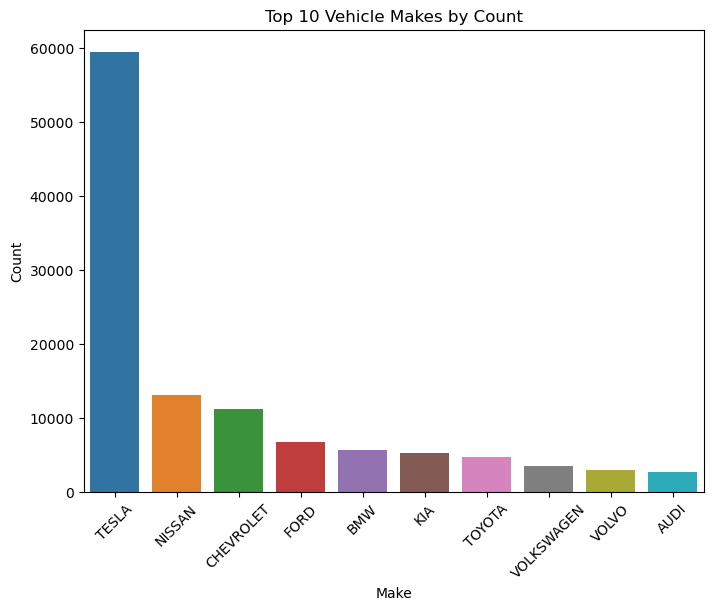

In [587]:
plt.figure(figsize=(8, 6))
vehicle_make_counts = vehicle_df['Make'].value_counts().head(10)
sns.barplot(x=vehicle_make_counts.index, y=vehicle_make_counts.values)
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Top 10 Vehicle Makes by Count')
plt.xticks(rotation=45)
plt.show()


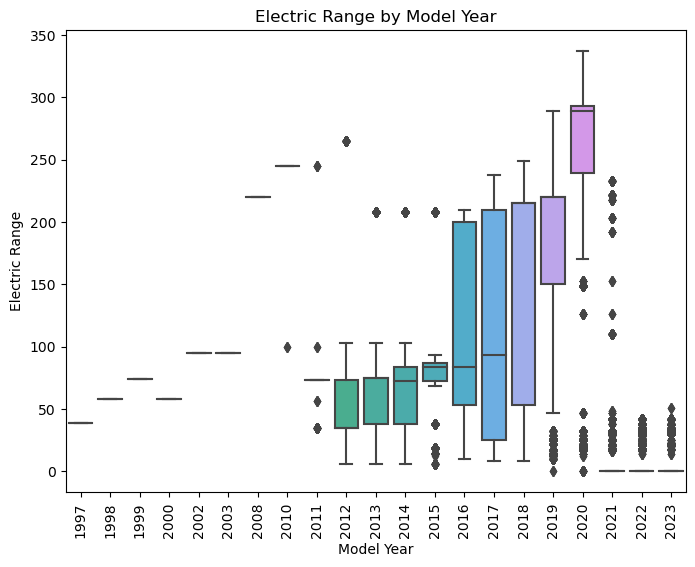

In [588]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Model Year', y='Electric Range', data=vehicle_df)
plt.xlabel('Model Year')
plt.ylabel('Electric Range')
plt.xticks(rotation=90)
plt.title('Electric Range by Model Year')
plt.show()

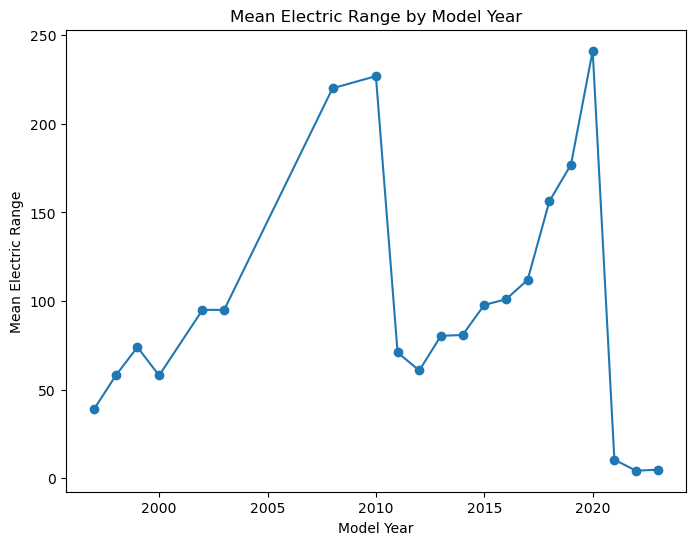

In [589]:
plt.figure(figsize=(8, 6))
Avg_electric_range = vehicle_df.groupby('Model Year')['Electric Range'].mean()
plt.plot(Avg_electric_range.index, Avg_electric_range.values, marker='o')
plt.xlabel('Model Year')
plt.ylabel('Mean Electric Range')
plt.title('Mean Electric Range by Model Year')
plt.show()

## Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [590]:
vehicle_df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [592]:
vehicle_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle Eligible                         60402
Eligibility unknown as battery range has not been researched    53108
Not eligible due to low battery range                           16379
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

In [597]:
cars_without_cafv=vehicle_df[vehicle_df['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=='Not eligible due to low battery range']
car_types=cars_without_cafv[['Make','Model']]
car_types

,Make,Model
6,FORD,FUSION
7,AUDI,Q5 E
8,FORD,C-MAX
14,FORD,C-MAX
15,KIA,NIRO
...,...,...
130377,BMW,530E
130385,AUDI,A3
130390,JEEP,WRANGLER
130407,TOYOTA,PRIUS PRIME


## Get all TESLA cars with the model year, and model type made in Bothell City.

In [599]:
vehicle_df.Make.unique()

array(['TESLA', 'HONDA', 'NISSAN', 'FORD', 'AUDI', 'KIA', 'CHEVROLET',
       'SMART', 'BMW', 'TOYOTA', 'JEEP', 'FIAT', 'VOLVO', 'CHRYSLER',
       'LEXUS', 'PORSCHE', 'CADILLAC', 'HYUNDAI', 'MERCEDES-BENZ',
       'RIVIAN', 'VOLKSWAGEN', 'JAGUAR', 'LINCOLN', 'MITSUBISHI', 'MINI',
       'POLESTAR', 'GENESIS', 'SUBARU', 'LUCID', 'TH!NK', 'LAND ROVER',
       'FISKER', 'AZURE DYNAMICS', 'WHEEGO ELECTRIC CARS', 'BENTLEY'],
      dtype=object)

In [607]:
tesla_bothell_cars=vehicle_df[(vehicle_df['Make']=='TESLA') & (vehicle_df['City']=='Bothell')] 

In [611]:
tesla_bothell_cars[['Make','Model Year','Model']]

,Make,Model Year,Model
39,TESLA,2020,MODEL 3
217,TESLA,2022,MODEL 3
218,TESLA,2022,MODEL Y
222,TESLA,2018,MODEL 3
292,TESLA,2017,MODEL X
...,...,...,...
129778,TESLA,2019,MODEL 3
129954,TESLA,2021,MODEL 3
129976,TESLA,2014,MODEL S
130295,TESLA,2022,MODEL 3


## Get all the cars that have an electric range of more than 100, and were made after 2015

In [616]:
cars_electric_range_above_100=vehicle_df[(vehicle_df['Electric Range']>100) & (vehicle_df['Model Year']>2015)]

In [617]:
cars_electric_range_above_100[['Make','Model Year','Model']]

,Make,Model Year,Model
0,TESLA,2018,MODEL X
2,TESLA,2019,MODEL 3
4,TESLA,2017,MODEL S
12,TESLA,2020,MODEL 3
13,TESLA,2020,MODEL 3
...,...,...,...
130417,TESLA,2020,MODEL Y
130428,NISSAN,2018,LEAF
130432,TESLA,2020,MODEL Y
130436,TESLA,2018,MODEL 3


## Draw plots to show the distribution between city and electric vehicle type

In [608]:
vehicle_df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [631]:
vehicle_df['City'].value_counts().head(30)

Seattle              22819
Bellevue              6732
Redmond               4814
Vancouver             4648
Kirkland              4066
Bothell               4020
Sammamish             3815
Renton                3306
Olympia               3128
Tacoma                2746
Bellingham            2216
Issaquah              2034
Spokane               1933
Mercer Island         1879
Kent                  1875
Woodinville           1824
Lynnwood              1785
Everett               1736
Snohomish             1508
Gig Harbor            1469
Shoreline             1435
Edmonds               1419
Bainbridge Island     1404
Auburn                1377
Tukwila               1190
Camas                 1149
Federal Way           1017
Maple Valley          1004
Seatac                 986
Lake Stevens           896
Name: City, dtype: int64

In [633]:
vehicle_df['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            99716
Plug-in Hybrid Electric Vehicle (PHEV)    30173
Name: Electric Vehicle Type, dtype: int64

In [652]:
top_cities = 25
top_25_cities = vehicle_df['City'].value_counts().nlargest(top_cities).index
city_df = vehicle_df[vehicle_df['City'].isin(top_25_cities)][['City', 'Electric Vehicle Type']]
count_df = pd.crosstab(city_df['City'], city_df['Electric Vehicle Type'])
count_df.sample(5)

Electric Vehicle Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
City,,
Woodinville,1515,309
Snohomish,1193,315
Tacoma,1986,760
Lynnwood,1511,274
Bothell,3392,628


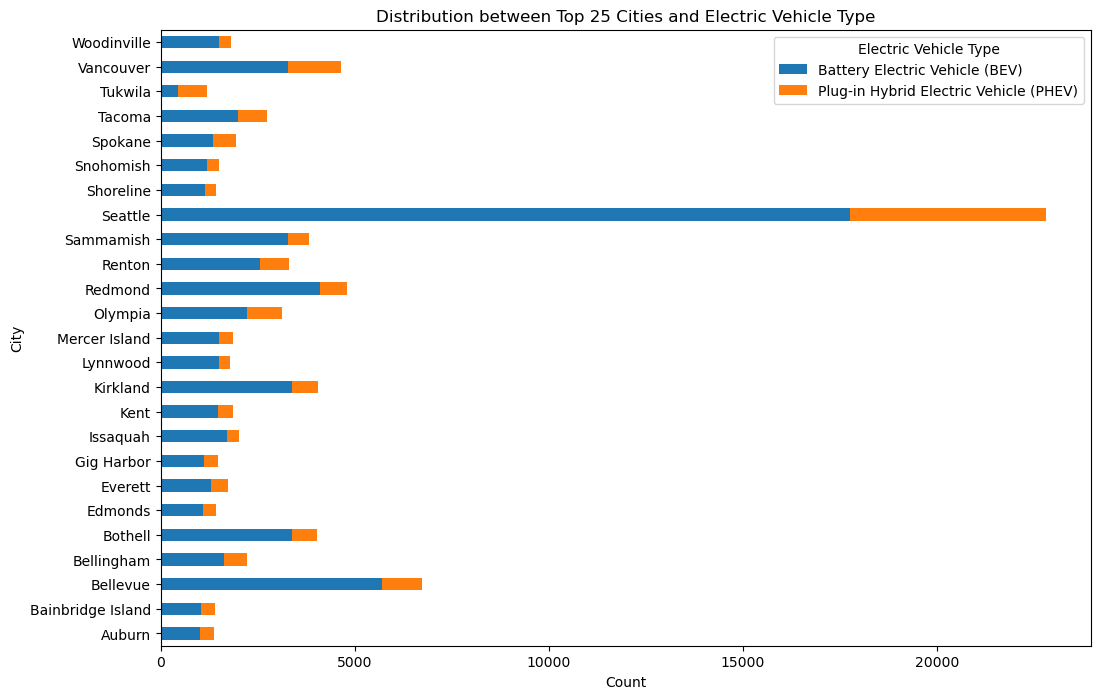

In [654]:
count_df.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.xlabel('Count')
plt.ylabel('City')
plt.title(f'Distribution between Top {top_cities} Cities and Electric Vehicle Type')
plt.legend(title='Electric Vehicle Type')
plt.show()

## Question 10 - Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or
paragraph, and return their respective count as a dictionary.
Note -
1. Write code comments wherever required for code
2. You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same.

In [662]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [669]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from collections import defaultdict

def count_pos_tags(text):
    words = word_tokenize(text) # Text Into Words
    
    pos_tags = pos_tag(words) #Part-of-speech tagging assigns a specific pos tag to each word

    counts = defaultdict(int) #Initialize counters to store count of each category

    for word, tag in pos_tags:
        if tag.startswith('VB'):
            counts['verbs'] += 1
        elif tag.startswith('NN'):
            counts['nouns'] += 1
        elif tag.startswith('PRP'):
            counts['pronouns'] += 1
        elif tag.startswith('JJ'):
            counts['adjectives'] += 1

    return dict(counts)

text="You have to write at least 2 additional test cases in which your program will run successfully and provide an explanation for the same."
count_pos_tags(text)

{'pronouns': 2, 'verbs': 4, 'adjectives': 3, 'nouns': 4}

In [670]:
text = "The quick brown fox jumps over the lazy dog."
count_pos_tags(text)


{'adjectives': 2, 'nouns': 3, 'verbs': 1}